## Introduction
#### Today morning, I sat down in front of my laptop and searched far and wide for datasets to work on Kaggle. Ended up here, with interesting data that I didn't know what to do with.
#### How do I analyse customer loyalty program data? What can I possibly derive out of it?
##### Possibly, something related to targeted reach?
#### So, here I am again. This notebook utilises the concept I learned in my college course of machine learning fundamentals - 
### K-Means Clustering.

#### In this notebook, you will observe me trying to find correlational features to build my model on, plotting various graphs in the process and shortlisting those that look pretty enough to be on my notebook, and finally building a K-Means clustering that finally returns a high-value customer dataset.

#### Let's go!

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/airline-loyalty-campaign-program-impact-on-flights/Customer Loyalty History.csv
/kaggle/input/airline-loyalty-campaign-program-impact-on-flights/Customer Flight Activity.csv


### Importing and inspecting datasets:

In [2]:
flight = pd.read_csv("/kaggle/input/airline-loyalty-campaign-program-impact-on-flights/Customer Flight Activity.csv")
loyalty = pd.read_csv("/kaggle/input/airline-loyalty-campaign-program-impact-on-flights/Customer Loyalty History.csv")

In [3]:
flight.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 405624 entries, 0 to 405623
Data columns (total 10 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Loyalty Number               405624 non-null  int64  
 1   Year                         405624 non-null  int64  
 2   Month                        405624 non-null  int64  
 3   Flights Booked               405624 non-null  int64  
 4   Flights with Companions      405624 non-null  int64  
 5   Total Flights                405624 non-null  int64  
 6   Distance                     405624 non-null  int64  
 7   Points Accumulated           405624 non-null  float64
 8   Points Redeemed              405624 non-null  int64  
 9   Dollar Cost Points Redeemed  405624 non-null  int64  
dtypes: float64(1), int64(9)
memory usage: 30.9 MB


In [4]:
loyalty.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16737 entries, 0 to 16736
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Loyalty Number      16737 non-null  int64  
 1   Country             16737 non-null  object 
 2   Province            16737 non-null  object 
 3   City                16737 non-null  object 
 4   Postal Code         16737 non-null  object 
 5   Gender              16737 non-null  object 
 6   Education           16737 non-null  object 
 7   Salary              12499 non-null  float64
 8   Marital Status      16737 non-null  object 
 9   Loyalty Card        16737 non-null  object 
 10  CLV                 16737 non-null  float64
 11  Enrollment Type     16737 non-null  object 
 12  Enrollment Year     16737 non-null  int64  
 13  Enrollment Month    16737 non-null  int64  
 14  Cancellation Year   2067 non-null   float64
 15  Cancellation Month  2067 non-null   float64
dtypes: f

#### From the above information, we can infer that there are 16737 unique loyalty customers. 
Since the aim of this code is to collect data on them, let us cluster the data based on the customers only.

## Data processing:

In [5]:
flight = flight.drop(['Year', 'Month'], axis=1) #dropping the unnecessary columns

#### As we can see, the rest of the columns are numerical and additive. So, let us group the data on the basis of the **Loyalty Number** by summing the rest of the columns.

In [6]:
customer = flight.groupby('Loyalty Number', as_index=False).sum()

In [7]:
customer

,Loyalty Number,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed
0,100018,157,35,192,50682,5376.00,1513,123
1,100102,173,42,215,40222,4115.25,1195,96
2,100140,152,38,190,41252,4184.25,593,48
3,100214,79,17,96,33982,3426.00,861,70
4,100272,127,36,163,40872,4108.04,1007,82
...,...,...,...,...,...,...,...,...
16732,999902,178,47,225,57227,6056.50,876,71
16733,999911,0,0,0,0,0.00,0,0
16734,999940,63,23,86,23410,2415.00,672,54
16735,999982,22,2,24,5948,594.00,0,0


#### Merging to obtain a final dataset by merging the two datasets obtained.

In [8]:
final = pd.merge(loyalty, customer, on='Loyalty Number', how='inner')
final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16737 entries, 0 to 16736
Data columns (total 23 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Loyalty Number               16737 non-null  int64  
 1   Country                      16737 non-null  object 
 2   Province                     16737 non-null  object 
 3   City                         16737 non-null  object 
 4   Postal Code                  16737 non-null  object 
 5   Gender                       16737 non-null  object 
 6   Education                    16737 non-null  object 
 7   Salary                       12499 non-null  float64
 8   Marital Status               16737 non-null  object 
 9   Loyalty Card                 16737 non-null  object 
 10  CLV                          16737 non-null  float64
 11  Enrollment Type              16737 non-null  object 
 12  Enrollment Year              16737 non-null  int64  
 13  Enrollment Month

In [9]:
final.isna().sum()

Loyalty Number                     0
Country                            0
Province                           0
City                               0
Postal Code                        0
Gender                             0
Education                          0
Salary                          4238
Marital Status                     0
Loyalty Card                       0
CLV                                0
Enrollment Type                    0
Enrollment Year                    0
Enrollment Month                   0
Cancellation Year              14670
Cancellation Month             14670
Flights Booked                     0
Flights with Companions            0
Total Flights                      0
Distance                           0
Points Accumulated                 0
Points Redeemed                    0
Dollar Cost Points Redeemed        0
dtype: int64

In [10]:
final.nunique()

Loyalty Number                 16737
Country                            1
Province                          11
City                              29
Postal Code                       55
Gender                             2
Education                          5
Salary                          5890
Marital Status                     3
Loyalty Card                       3
CLV                             7984
Enrollment Type                    2
Enrollment Year                    7
Enrollment Month                  12
Cancellation Year                  6
Cancellation Month                12
Flights Booked                   268
Flights with Companions           92
Total Flights                    328
Distance                       12714
Points Accumulated             12081
Points Redeemed                 2329
Dollar Cost Points Redeemed      283
dtype: int64

In [11]:
import plotly.express as px

In [12]:
final_encoded=pd.get_dummies(final, columns=['Gender', 'Loyalty Card'])
final_encoded

,Loyalty Number,Country,Province,City,Postal Code,Education,Salary,Marital Status,CLV,Enrollment Type,...,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed,Gender_Female,Gender_Male,Loyalty Card_Aurora,Loyalty Card_Nova,Loyalty Card_Star
0,480934,Canada,Ontario,Toronto,M2Z 4K1,Bachelor,83236.0,Married,3839.14,Standard,...,171,51877,5224.44,1418,115,True,False,False,False,True
1,549612,Canada,Alberta,Edmonton,T3G 6Y6,College,NaN,Divorced,3839.61,Standard,...,215,41578,4176.04,1971,159,False,True,False,False,True
2,429460,Canada,British Columbia,Vancouver,V6E 3D9,College,NaN,Single,3839.75,Standard,...,87,19664,1963.00,374,30,False,True,False,False,True
3,608370,Canada,Ontario,Toronto,P1W 1K4,College,NaN,Single,3839.75,Standard,...,159,36043,3626.68,1291,105,False,True,False,False,True
4,530508,Canada,Quebec,Hull,J8Y 3Z5,Bachelor,103495.0,Married,3842.79,Standard,...,176,36840,3689.68,0,0,False,True,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16732,823768,Canada,British Columbia,Vancouver,V6E 3Z3,College,NaN,Married,61850.19,Standard,...,139,40743,4070.00,0,0,True,False,False,False,True
16733,680886,Canada,Saskatchewan,Regina,S1J 3C5,Bachelor,89210.0,Married,67907.27,Standard,...,243,43420,4348.76,1645,132,True,False,False,False,True
16734,776187,Canada,British Columbia,Vancouver,V5R 1W3,College,NaN,Single,74228.52,Standard,...,207,49113,4925.56,1529,124,False,True,False,False,True
16735,906428,Canada,Yukon,Whitehorse,Y2K 6R0,Bachelor,-57297.0,Married,10018.66,2018 Promotion,...,154,41381,4166.44,0,0,False,True,False,False,True


In [13]:
# Create a correlation matrix
num = final_encoded.select_dtypes(include=['int64', 'float64', 'boolean']).columns

correlation_matrix = final_encoded[num].corr()

fig = px.imshow(correlation_matrix,
                labels=dict(color="Correlation"),
                x=correlation_matrix.index,
                y=correlation_matrix.columns,
                color_continuous_scale='Viridis',
                title='Correlation Heatmap of Features')

# Show the plot
fig.show()


#### According to the heatmap, there are some observations:

1. Those members who have cancelled their membership have a negative trend with the number of flights and points accumulated/redeemed. 
2. A higher value of Enrollment Year and a lower value of Cancellation Year correlates to a lower value of flights and points accumulated/redeemed.

#### Above two points are because their record tenure is shorter.

3. Points accumulated and points redeemed are in a strong positive trending correlation with flights booked. 
4. There is a slight correlation between Loyalty Card status and the CLV (Customer Lifetime Value). Aurora has a slight positive trend, while Star has a slight negative trend.

#### One might expect there to be trends with the Gender and Salary of a Customer, but that makes no difference to any value.

#### Let's drop the Country column as it is redundant (it only has value = "Canada" for all records). The Dollar Cost points redeemed can be ignored as well, since we will work with the total points redeemed instead. The Province column can be dropped as well, as we will work with the more varied 'City' column for better clustering.

In [14]:
final = final.drop(['Country', 'Province','Dollar Cost Points Redeemed'], axis=1)

##### If a member has cancelled their membership, we will set a column only for yes (1) or no (0) values.

In [15]:
final['Cancelled'] = final['Cancellation Year'].notna().astype(int) 
final = final.drop(['Cancellation Month', 'Enrollment Month'], axis=1)
final

,Loyalty Number,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Cancellation Year,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Cancelled
0,480934,Toronto,M2Z 4K1,Female,Bachelor,83236.0,Married,Star,3839.14,Standard,2016,NaN,132,39,171,51877,5224.44,1418,0
1,549612,Edmonton,T3G 6Y6,Male,College,NaN,Divorced,Star,3839.61,Standard,2016,NaN,190,25,215,41578,4176.04,1971,0
2,429460,Vancouver,V6E 3D9,Male,College,NaN,Single,Star,3839.75,Standard,2014,2018.0,66,21,87,19664,1963.00,374,1
3,608370,Toronto,P1W 1K4,Male,College,NaN,Single,Star,3839.75,Standard,2013,NaN,123,36,159,36043,3626.68,1291,0
4,530508,Hull,J8Y 3Z5,Male,Bachelor,103495.0,Married,Star,3842.79,Standard,2014,NaN,132,44,176,36840,3689.68,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16732,823768,Vancouver,V6E 3Z3,Female,College,NaN,Married,Star,61850.19,Standard,2012,NaN,126,13,139,40743,4070.00,0,0
16733,680886,Regina,S1J 3C5,Female,Bachelor,89210.0,Married,Star,67907.27,Standard,2014,NaN,198,45,243,43420,4348.76,1645,0
16734,776187,Vancouver,V5R 1W3,Male,College,NaN,Single,Star,74228.52,Standard,2014,NaN,174,33,207,49113,4925.56,1529,0
16735,906428,Whitehorse,Y2K 6R0,Male,Bachelor,-57297.0,Married,Star,10018.66,2018 Promotion,2018,NaN,128,26,154,41381,4166.44,0,0


## Analysis and Data Visualisation

In [16]:
fig0 = px.scatter(final, x='Points Accumulated', y='Points Redeemed',
                         size='Flights Booked', hover_data=['Loyalty Number'],
                         title='Points Accumulated vs. Redeemed, sized by Flights Booked')
fig0.show()


#### We can infer from the above graph that the more points are accumulated, the more flights are booked. Additionally, despite what logic dictates, it is not clear that more accumulation results to higher redemption of points. 

In [17]:
fig1 = px.histogram(final, x='Loyalty Card', y='CLV', color='Loyalty Card',
             title='CLV vs Loyalty Card')

# Show the plot
fig1.show()

#### We can see that a customer has higher value if they are from the Star Loyalty Card, then it is Nova and then it's Aurora. 

In [18]:
flights_per_city = final.groupby('City')['Flights Booked'].sum().reset_index()
flights_per_city = flights_per_city.sort_values(by = 'Flights Booked', ascending=False)

fig2 = px.line(flights_per_city[:100], x = 'City', y = 'Flights Booked', markers=True, title = 'Flights Booked per City')
fig2.show()

In [19]:
flights = final[final['City'].isin(['Toronto', 'Vancouver', 'Montreal'])]
sum_TVM = flights['Flights Booked'].sum()
sum_total = final['Flights Booked'].sum()
percent=(sum_TVM/sum_total)*100

print(f"Out of all the flights booked in Canada, {percent:.2f}% of them are from Toronto, Vancouver or Montreal")

Out of all the flights booked in Canada, 47.77% of them are from Toronto, Vancouver or Montreal


#### It is not a surprise to know that the top 3 cities of Canada have the most flights booked. Toronta, Vancouver, and Montreal together booked 47.7% of all flights.

In [20]:
# Group by Enrollment Year
counts_enrollment = final.groupby('Enrollment Year')['Loyalty Number'].count().reset_index()

# Group by Cancellation Year
counts_cancellation = final.groupby('Cancellation Year')['Loyalty Number'].count().reset_index()

# Merge the dataframes on 'Year'
merged_counts = pd.merge(counts_enrollment, counts_cancellation, how='outer', left_on='Enrollment Year', right_on='Cancellation Year')

merged_counts = merged_counts.rename(columns={'Loyalty Number_x': 'Enrollments', 'Loyalty Number_y': 'Cancellations'})

# Calculate the net value
merged_counts['Net'] = merged_counts['Enrollments'] - merged_counts['Cancellations']

fig3 = px.line(merged_counts, x='Enrollment Year', y=['Enrollments', 'Cancellations', 'Net'],
              markers=True, title='Customer Enrollments, Cancellations, and Net Per Year',
              labels={'value': 'Count', 'variable': 'Event', 'Enrollment Year': 'Year'})

fig3.show()


#### The customers churn positively. Despite a rising cancellation rate of customers across the years, the enrollments are in such a high number, that the net is slightly affected. 
#### There is a profitable uptrend from 2017-18 owing to the high number of enrollments.

In [21]:
fig4 = px.scatter(final, y = 'Points Accumulated', x = 'Flights Booked',title = 'Points Accumulated per Flight')
fig4.show()

## Training K-Means Model

#### So, what is K-Means? Think back to your high-school friends. Didn't the nerds eat lunch in one group while the jocks stuck together somewhere else? K-Means utilises the concept that similar datapoints stick together. 
#### It is a process of evaluating the distance between datapoints and clustering them into the specified number of clusters based on their features' similarity.

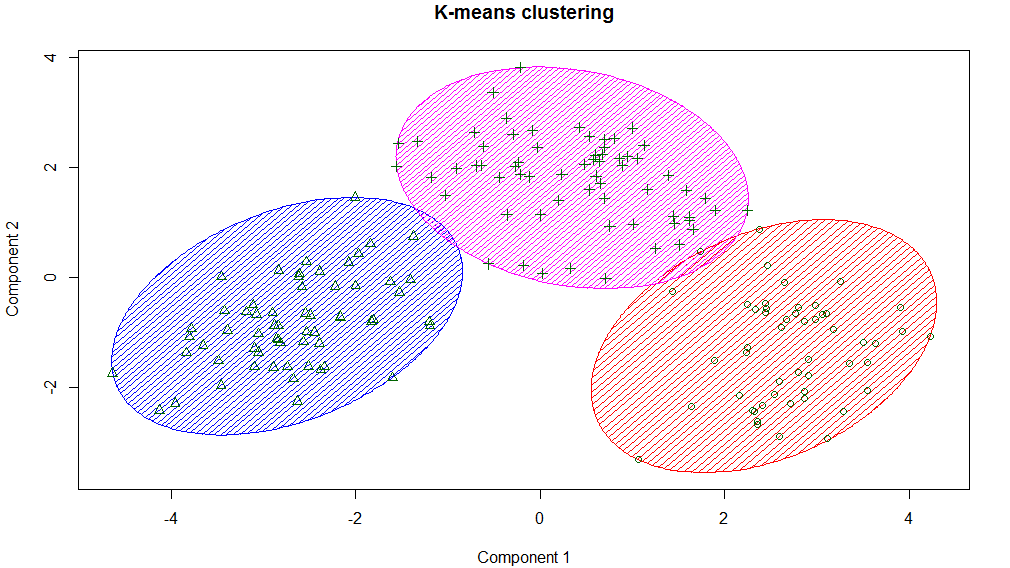

#### Like this.

In [22]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

#### Since we need to develop the data to target **high value customers**, the cancelled memberships and those customers with zero flights booked are irrelevant. Let's remove them: 

In [23]:
df = final[final["Cancelled"]!=1]
df = df[df["Flights Booked"]!=0]
df

,Loyalty Number,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Cancellation Year,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Cancelled
0,480934,Toronto,M2Z 4K1,Female,Bachelor,83236.0,Married,Star,3839.14,Standard,2016,NaN,132,39,171,51877,5224.44,1418,0
1,549612,Edmonton,T3G 6Y6,Male,College,NaN,Divorced,Star,3839.61,Standard,2016,NaN,190,25,215,41578,4176.04,1971,0
3,608370,Toronto,P1W 1K4,Male,College,NaN,Single,Star,3839.75,Standard,2013,NaN,123,36,159,36043,3626.68,1291,0
4,530508,Hull,J8Y 3Z5,Male,Bachelor,103495.0,Married,Star,3842.79,Standard,2014,NaN,132,44,176,36840,3689.68,0,0
5,193662,Whitehorse,Y2K 6R0,Male,Bachelor,51124.0,Married,Star,3844.57,Standard,2012,NaN,292,54,346,83996,8464.16,1222,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16731,900501,Sudbury,M5V 1G5,Male,College,NaN,Single,Star,61134.68,Standard,2012,NaN,106,22,128,34126,3448.52,341,0
16732,823768,Vancouver,V6E 3Z3,Female,College,NaN,Married,Star,61850.19,Standard,2012,NaN,126,13,139,40743,4070.00,0,0
16733,680886,Regina,S1J 3C5,Female,Bachelor,89210.0,Married,Star,67907.27,Standard,2014,NaN,198,45,243,43420,4348.76,1645,0
16734,776187,Vancouver,V5R 1W3,Male,College,NaN,Single,Star,74228.52,Standard,2014,NaN,174,33,207,49113,4925.56,1529,0


#### Let's create a few more features to make our clustering more targeted:
##### 1. Profit Efficiency: How much is a customer spending their loyalty points during booking?
##### 2. Points per Flight: A higher value suggests that the customer travels costlier.
##### 3. Points: The true measure of utilisation of points.

In [24]:
df['Profit Efficiency'] = df['Points Redeemed'] / df['Flights Booked']
df['Points per Flight'] = df['Points Accumulated'] / df['Flights Booked']
df['Points'] = df['Points Redeemed'] / df['Points Accumulated']

In [25]:
# Select and extract selected features
X = df[['Flights Booked','Profit Efficiency', 'Points per Flight', 'Points Accumulated', 'Points']]

# Normalize or scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Choose the number of clusters (K)
k = 3

# Apply K-means clustering
kmeans = KMeans(n_clusters=k, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



In [26]:
cluster_stats = df.groupby('Cluster').agg({
    'Loyalty Number': 'count',
    'Flights Booked': ['mean', 'std'],
    'Points Accumulated': ['mean', 'std'],
    'Profit Efficiency': 'mean',
    'Points per Flight': 'mean',
    'Points': 'mean'
}).reset_index()

In [27]:
cluster_stats

Cluster Loyalty Number Flights Booked            Points Accumulated  \
                   count           mean        std               mean   
0       0           2623      50.934426  27.943844        1567.983149   
1       1           1173      72.601023  36.890199        2265.708312   
2       2          10311     134.719814  26.633420        4034.052507   

               Profit Efficiency Points per Flight    Points  
           std              mean              mean      mean  
0   898.931897          2.791565         33.352773  0.088660  
1  1167.779150         25.668239         32.704355  0.785709  
2   763.818838          7.081538         30.324384  0.234739

In [28]:
fig = px.box(df, x='Cluster', y='Flights Booked', color='Cluster', title='Box Plot of Flights Booked by Cluster')
fig.show()

In [29]:
df['High Value Customer'] = (df['Cluster'] == 2).astype(int)

#### So, now that we have classified our high-value customers...let's see if we clustered them right.

In [30]:
df[df['High Value Customer'] == 1][['Loyalty Number', 'Flights Booked']].sort_values(by='Flights Booked',ascending=False)

,Loyalty Number,Flights Booked
4168,336882,354
5935,464187,324
1793,775768,322
13237,255836,313
2192,876062,309
...,...,...
1827,404920,75
6166,401060,75
955,282930,75
10485,905569,75


In [31]:
df[df['High Value Customer'] == 0][['Loyalty Number', 'Flights Booked']].sort_values(by='Flights Booked',ascending=False)

,Loyalty Number,Flights Booked
14511,539704,175
16222,762389,159
12295,750688,158
12254,696609,157
8107,214030,154
...,...,...
11492,731254,1
11458,756663,1
16247,642247,1
10147,925918,1


#### It sure seems like it! The maximum number of flights booked are by high-value customers. There are a few discrepancies as well, so we can try more feature engineering in the future versions.

In [32]:
fig5 = px.histogram(df, x='Cluster', y='Flights Booked', color='Cluster',
             title='Total flights booked per Cluster', histfunc='avg')

# Show the plot
fig5.show()

## We have successfully clustered our data and obtained high-value customers to target! 